In [31]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print("Done Import")

Done Import


In [32]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)

jodi = pd.read_excel("jodi-oil-world-database.xlsx")
jodi

,Value,Date,Sub-Sector,Super Region,Energy Product,Flow Breakdown,Time Level,Country,Unit of Measurement,Source
0,14.74,2016-05-01,JODI OIL-WORLD DATABASE,GLOBAL DATA,TOTAL OIL PRODUCTS,DEMAND,MONTHLY,BRUNEI DARUSSALAM,THOUSAND BARRELS PER DAY(KB-D),JOINT ORGANISATIONS DATA INITIATIVE - JODI
1,14.83,2017-04-01,JODI OIL-WORLD DATABASE,GLOBAL DATA,TOTAL OIL PRODUCTS,DEMAND,MONTHLY,BRUNEI DARUSSALAM,THOUSAND BARRELS PER DAY(KB-D),JOINT ORGANISATIONS DATA INITIATIVE - JODI
...,...,...,...,...,...,...,...,...,...,...
17893,79.00,2012-02-01,JODI OIL-WORLD DATABASE,GLOBAL DATA,TOTAL OIL PRODUCTS,DEMAND,MONTHLY,CUBA,THOUSAND BARRELS PER DAY(KB-D),JOINT ORGANISATIONS DATA INITIATIVE - JODI
17894,80.00,2012-06-01,JODI OIL-WORLD DATABASE,GLOBAL DATA,TOTAL OIL PRODUCTS,DEMAND,MONTHLY,CUBA,THOUSAND BARRELS PER DAY(KB-D),JOINT ORGANISATIONS DATA INITIATIVE - JODI


In [33]:
pd.set_option('display.max_rows', None)
print(jodi.info(verbose=True),'\n','-'*80,'\n','-'*80)
jodi_desc = pd.DataFrame()
jodi_desc['isna'] = jodi.isna().sum()
jodi_desc['nunique'] = jodi.nunique()
print(jodi_desc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Value                17895 non-null  float64
 1   Date                 17895 non-null  object 
 2   Sub-Sector           17895 non-null  object 
 3   Super Region         17895 non-null  object 
 4   Energy Product       17895 non-null  object 
 5   Flow Breakdown       17895 non-null  object 
 6   Time Level           17895 non-null  object 
 7   Country              17895 non-null  object 
 8   Unit of Measurement  17895 non-null  object 
 9   Source               17895 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.4+ MB
None 
 -------------------------------------------------------------------------------- 
 --------------------------------------------------------------------------------
                     isna  nunique
Value                   0     780

In [34]:
pd.set_option('display.max_rows', 5)
jodi = jodi.drop(['Sub-Sector', 'Super Region', 'Energy Product', 'Flow Breakdown', 
                  'Time Level', 'Unit of Measurement', 'Source'], axis=1)

jodi['Date'] = pd.to_datetime(jodi['Date'])
jodi

,Value,Date,Country
0,14.74,2016-05-01,BRUNEI DARUSSALAM
1,14.83,2017-04-01,BRUNEI DARUSSALAM
...,...,...,...
17893,79.00,2012-02-01,CUBA
17894,80.00,2012-06-01,CUBA


In [62]:
#total = len(data)
def horizontal_labelvalue(data, graph, total):
    for p in graph.patches:
        percentage = '{:.4f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 2
        y = p.get_y() + p.get_height() / 2 + 0.3
        graph.annotate(('{:.0f}'.format(p.get_width())), (x, y), ha = 'center', va = 'center', 
                       xytext = (30, 3), textcoords = 'offset points')
        graph.annotate(percentage, (x, y), ha = 'center', va = 'center', 
                       xytext = (80, 3), textcoords = 'offset points')  

In [56]:
jodi_country = jodi.groupby(['Country'], as_index=False).sum()
jodi_country = jodi_country.sort_values(['Value'], ascending=0)
jodi_country

,Country,Value
97,UNITED STATES,4395433.55
17,CHINA,1814981.75
...,...,...
37,GRENADA,57.00
89,TAJIKISTAN,23.00


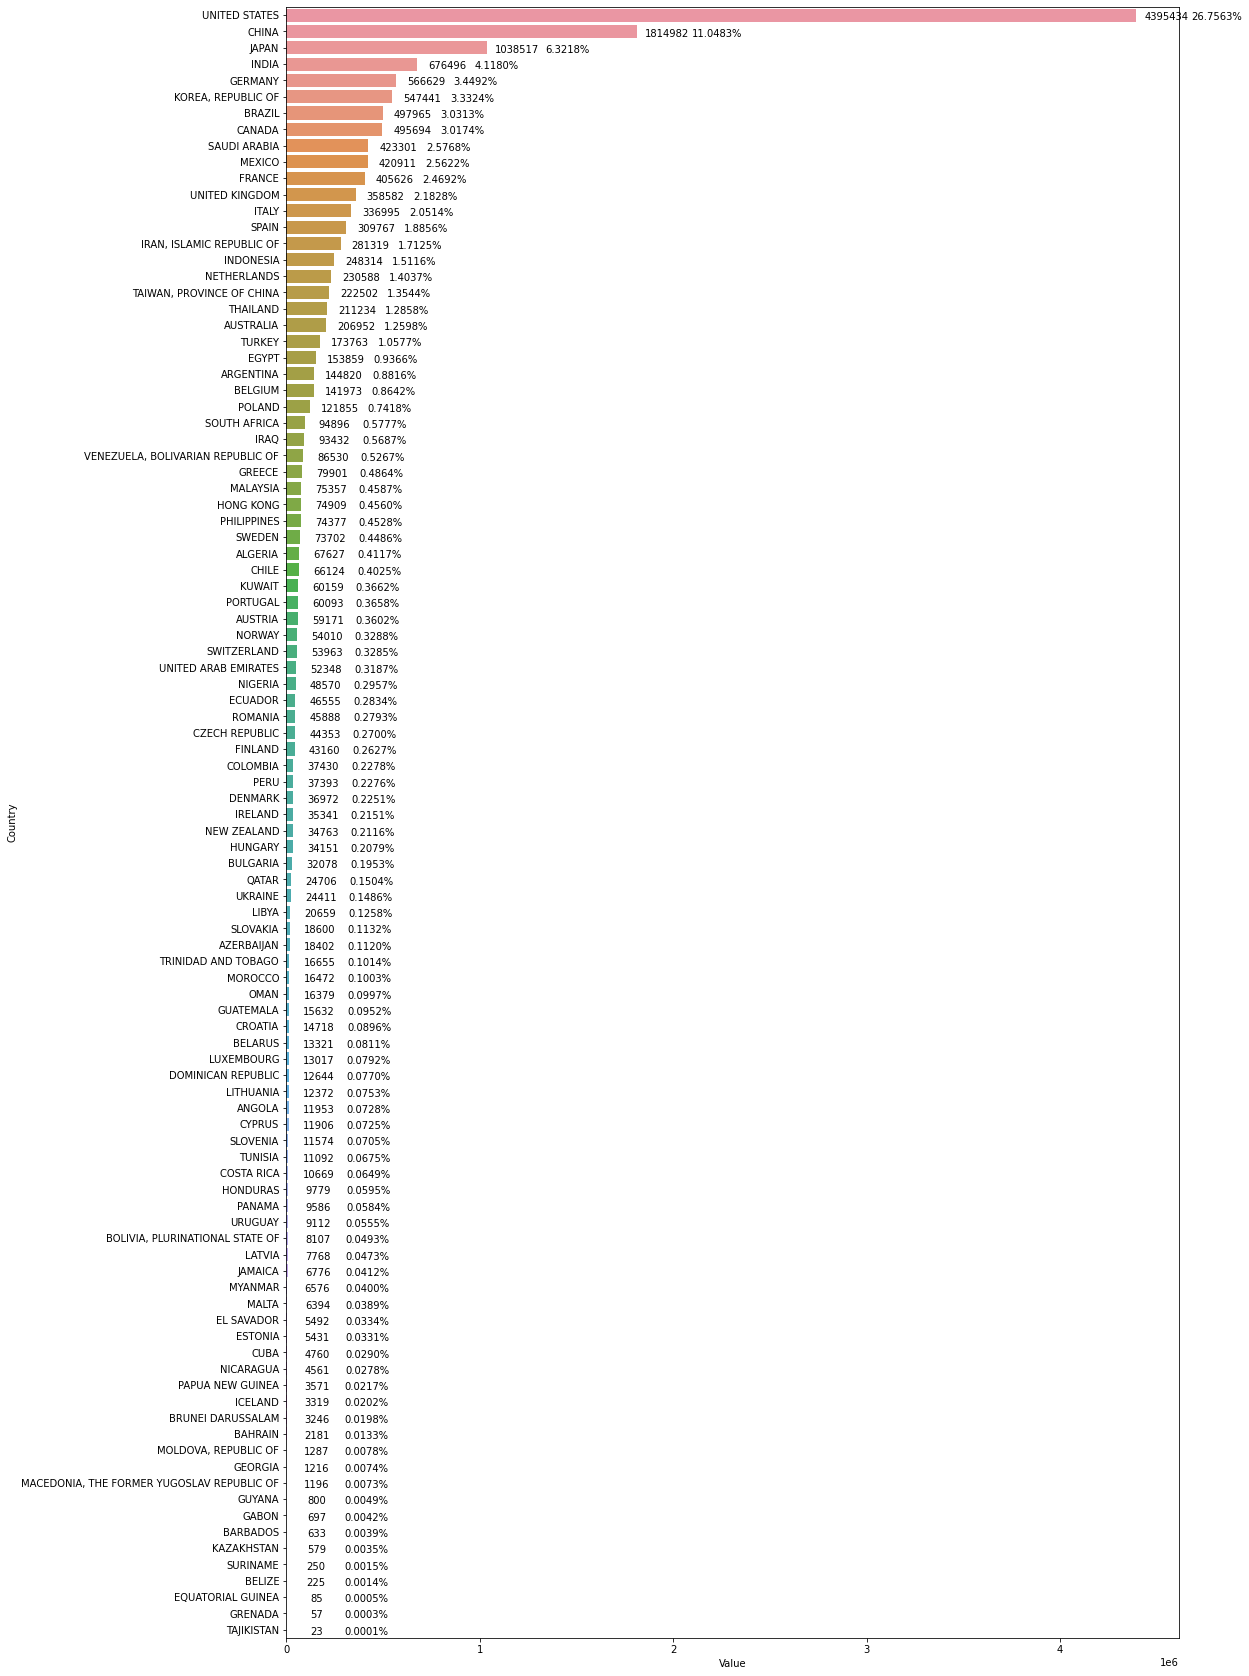

In [63]:
fig, ax1 = plt.subplots(figsize=(16, 30))

graph = sns.barplot(y='Country', x='Value', data=jodi_country, ax=ax1)
horizontal_labelvalue(jodi_country['Country'], graph, total=jodi['Value'].sum())

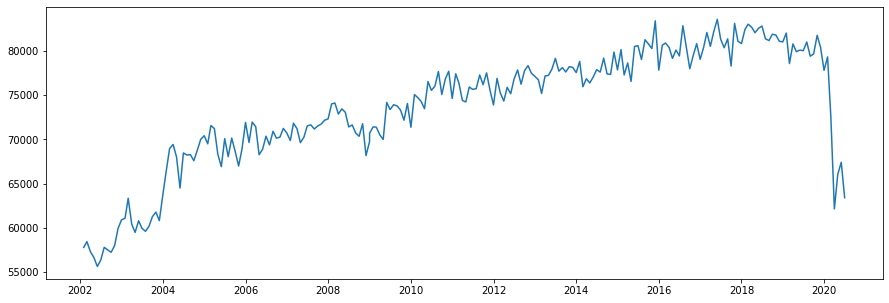

In [37]:
jodi_2 = jodi.groupby('Date')['Value'].sum()

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(jodi_2.index, jodi_2.values)